In [29]:
import os 
from typing import List

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from names import names

In [83]:
def read_and_average(folder_name:str,colnames:List[str],n_boids:int,n_columns:int) -> pd.DataFrame:
    """
    Reads a file structure like:
    | folder_name
    | - - - |Run1
    | - - - | - - -| run1_results_0.json
    | - - - | - - -| run1_results_1.sjon
    | - - - |Run2
    | - - - | - - -| run2_results_0.json
    | - - - | - - -| run2_results_1.json
    | - - - |Run3
    ...................................

    Args:
        folder_name (str): Name of the root folder for example FoodCooldown5
        colnames (List[str]): The names of the columns. 
        n_boids (int): The number of boids
        n_columns (int): The number of columns (has to be 2 less than the final result).

    Returns:
        pd.DataFrame: The results dataframe.
    """
    # Accumuates the results for all runs.
    accumulator = np.zeros((20,n_boids,n_columns))

    # Loop over each run (10 in our case)
    for directory in os.listdir(folder_name):
        path_sub_dir = os.path.join(folder_name,directory)
        # Placehold for all generatiosn during that run
        run_accumulator = np.zeros((20,n_boids,n_columns))
        # For each generation
        for g,_file in enumerate(os.listdir(path_sub_dir)):
            # 1. Read and transform the files into a table with all columns + FOOD EATEN and DENSITY.
            # 2. Read Json into datafram.e The frame is Boid 1..N columns where 
            # 3. the first row is an array with all the weights,
            # 4. the second is the food each boid ate
            # 5. the third is the density for each boid
            # 6. Transform it to table with weights + food + density as columns
            # 7. And each Boids with its values as rows. 
            generation_raw = pd.read_json(os.path.join(path_sub_dir,_file))
            one_result = pd.DataFrame(columns=colnames)
            for i in generation_raw.iloc[0].reset_index()[0]:
                one_result.loc[len(one_result)] = i
            one_result.set_index(generation_raw.iloc[0].index)
            one_result['FOOD EATEN'] = generation_raw.iloc[1].reset_index()[1]
            one_result['DENSITY'] = generation_raw.iloc[2].reset_index()[2]

            # Transfrm the table discussed in 7 to numpy
            run_accumulator[g] = one_result.to_numpy(dtype=np.float16)
        # add this run_accumulator to overall accumulator
        accumulator += run_accumulator
    
    # We have 10 runs. Average all the results over the 10 runs.
    # Now we have an array which contains for all 20 generations
    # The Weights, Food eathen and density of each boid. Its shape is (20,30,15) <-> (Generation,Boid ID, weights)
    return accumulator/len(os.listdir(folder_name))

avg_results=read_and_average('FoodCooldown5',names,30,15)


In [87]:
avg_results[0].shape

result = pd.DataFrame(data=(avg_results[10]),columns=names+["FOOD EATEN","Density"])
result


,rw_mean_pos,rw_near_pos,rw_far_pos,rw_mean_vel,rw_near_vel,rw_far_vel,rw_mean_all,rw_near_all,rw_far_all,rw_mean_sep,rw_near_sep,rw_far_sep,rw_near_food,FOOD EATEN,Density
0,-0.179602,-0.377107,0.292670,-0.367853,-0.332182,-0.583487,0.107600,0.449460,0.065735,-0.342407,0.142557,0.023663,0.960278,0.0,0.0
1,0.077905,-0.059866,0.194153,-0.994006,-0.652722,-0.247375,-0.003973,0.385620,-0.051611,0.025195,0.063321,-0.217456,1.020435,0.0,0.0
2,-0.146454,-0.323827,-0.203961,-0.685291,-0.202839,-0.244620,0.106653,0.373633,-0.002615,-0.195959,0.162683,-0.106412,1.075806,0.0,0.0
3,-0.235502,-0.217111,0.297397,-0.801144,-0.438855,-0.569690,0.093561,0.348987,0.089294,-0.142871,0.008124,-0.063220,1.272021,0.0,0.0
4,0.049762,0.106677,-0.123877,-0.694891,-0.138684,-0.346216,0.033426,0.574487,-0.216272,0.110339,-0.069565,-0.197543,1.236584,0.0,0.0
5,-0.321112,-0.215010,0.158325,-0.746448,-0.166223,-0.417078,0.139069,0.320483,-0.001245,-0.374005,0.050342,0.123651,1.138747,0.0,0.0
6,0.024841,-0.037750,-0.146381,-0.954870,-0.345856,-0.369022,-0.061609,0.327100,-0.140572,0.168677,-0.075697,-0.110345,1.114515,0.0,0.0
7,-0.338525,-0.089240,0.086401,-0.775098,-0.523358,-0.407617,-0.087440,0.132181,0.016241,0.059058,0.032666,0.362927,1.047461,0.0,0.0
8,0.014758,-0.078702,0.023508,-0.772339,-0.478369,-0.321735,-0.327283,0.224158,-0.093201,-0.045276,0.082867,0.140576,1.101880,0.0,0.0
9,-0.191013,-0.006805,-0.159502,-0.658173,-0.364380,-0.602484,-0.068405,0.359454,-0.050769,0.050134,-0.095239,-0.021545,1.081396,0.0,0.0


In [88]:
pd.read_json('result_0results.json')


,BOID: 0,BOID: 1,BOID: 2,BOID: 3,BOID: 4,BOID: 5,BOID: 6,BOID: 7,BOID: 8,BOID: 9,...,BOID: 20,BOID: 21,BOID: 22,BOID: 23,BOID: 24,BOID: 25,BOID: 26,BOID: 27,BOID: 28,BOID: 29
0,"[-0.716386287197031, -0.9831516946191491, -0.1...","[-0.9824396768740071, -0.502402098660332, -0.4...","[-0.7218461393420681, -0.8887910575725031, -0....","[0.20464437747567302, -0.12456656587136901, 0....","[0.38402076080866104, -0.437232102008538, -0.1...","[0.551360850644365, 0.949581078574771, -0.7532...","[0.9820623601776031, -0.9350359665778071, 0.28...","[0.23931935881977903, 0.563240650082758, 0.583...","[-0.897669646962268, 0.6830624607794681, -0.70...","[0.5994037601428891, 0.300529917261661, 0.8009...",...,"[-0.079609731903718, 0.10235522969341701, 0.58...","[0.9067769282401941, 0.014248479939594001, 0.7...","[-0.32029894335152603, -0.21682526476683803, -...","[0.529651038460282, 0.624374139902626, -0.1480...","[0.493893561767114, -0.074247144039637, -7.469...","[-0.028009139561826, -0.032558759384393, 0.314...","[0.6559373097182011, -0.734868034955768, 0.511...","[-0.6903603644106471, 0.14378059777035002, -0....","[0.690064066838591, 0.247134412180243, -0.8791...","[0.8585544202692341, 0.037804148918683, -0.309..."
1,10,5,0,0,0,1,2,0,0,1,...,1,0,7,0,1,0,0,0,0,10


In [79]:


results = pd.read_json('result_0results.json')

weights_food_df = pd.DataFrame(columns=names)
for i in results.iloc[0].reset_index()[0]:
    weights_food_df.loc[len(weights_food_df)] = i
weights_food_df.set_index(results.iloc[0].index)
weights_food_df['FOOD EATEN'] = results.iloc[1].reset_index()[1]

weights_food_df

,rw_mean_pos,rw_near_pos,rw_far_pos,rw_mean_vel,rw_near_vel,rw_far_vel,rw_mean_all,rw_near_all,rw_far_all,rw_mean_sep,rw_near_sep,rw_far_sep,rw_near_food,bruh,bruh2,FOOD EATEN
0,-0.716386,-0.983152,-0.139172,0.748118,0.999858,-0.066608,-0.107339,0.114952,-0.022456,-0.132054,0.991059,-0.173553,0.131986,-0.219546,-0.121599,10
1,-0.982440,-0.502402,-0.422952,0.176765,-0.453203,-0.623826,0.827766,-0.065529,-0.932478,0.674575,-0.885110,-0.498396,0.315121,0.584138,0.373235,5
2,-0.721846,-0.888791,-0.804010,0.836656,0.215203,0.337226,-0.420985,-0.742508,-0.560772,0.980790,-0.949879,-0.449599,0.981795,0.283114,-0.227380,0
3,0.204644,-0.124567,0.028073,-0.316708,-0.463129,0.037158,0.172062,-0.379638,0.908685,-0.062776,-0.021995,-0.154251,-0.152875,-0.310017,0.092780,0
4,0.384021,-0.437232,-0.153789,-0.212110,0.688914,0.014726,-0.777509,0.302986,0.679127,-0.058272,0.436084,0.169293,-0.836246,0.444152,-0.740798,0
5,0.551361,0.949581,-0.753210,0.319618,-0.683235,0.674641,0.040434,-0.959606,0.747307,-0.975797,-0.656067,0.367281,-0.761679,0.972507,-0.388297,1
6,0.982062,-0.935036,0.287309,-0.759705,0.453851,0.810689,0.047193,-0.631473,0.172652,-0.435661,-0.635106,0.300717,0.776260,-0.046574,-0.723227,2
7,0.239319,0.563241,0.583775,0.063266,-0.787671,0.114534,0.569043,-0.473820,0.078894,0.576288,0.730152,-0.511447,-0.808889,0.534924,-0.008222,0
8,-0.897670,0.683062,-0.702520,0.177225,-0.125623,-0.568275,-0.577131,-0.524987,0.807807,-0.710570,-0.904246,-0.596622,0.786548,-0.818757,0.611789,0
9,0.599404,0.300530,0.800926,0.809068,-0.338573,-0.719693,0.199351,-0.368474,-0.171779,-0.259728,-0.879492,0.449221,0.590148,0.488877,-0.975603,1


In [49]:
food_df

,FOOD EATEN
0,10
1,5
2,0
3,0
4,0
5,1
6,2
7,0
8,0
9,1


In [17]:
d = pd.DataFrame(columns=['X','Y'])
x = np.random.randn(10,2)

array([[ 1.00408556, -0.17289509],
       [-2.59728426,  1.29394956],
       [-0.32795596,  0.4433267 ],
       [ 1.04719282,  0.42198202],
       [ 0.62066794,  1.85317475],
       [ 0.90354477,  1.11163732],
       [ 1.00481263, -1.24921165],
       [ 0.70605904, -0.76407031],
       [ 0.16118836,  0.83554552],
       [-1.01985659, -0.68618259]])

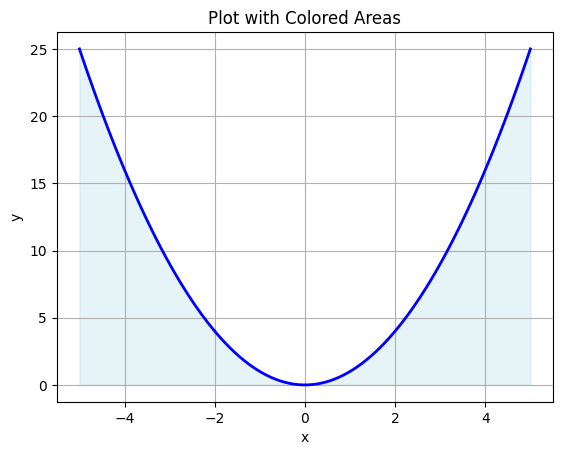

In [9]:
def f(x):
    return x**2

x = np.linspace(-5, 5, 100)
y = f(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.fill_between(x, y, color='lightblue', alpha=0.3, where=(y >= 0))
plt.fill_between(x, y, color='lightcoral', alpha=0.3, where=(y < 0))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot with Colored Areas')
plt.grid(True)

plt.show()

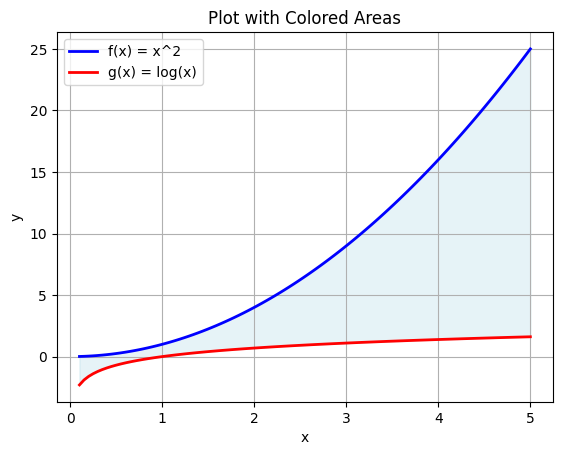

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def g(x):
    return np.log(x)

x = np.linspace(0.1, 5, 100)  # Adjust the range to avoid log(0) error

y1 = f(x)
y2 = g(x)

plt.plot(x, y1, 'b-', linewidth=2, label='f(x) = x^2')
plt.plot(x, y2, 'r-', linewidth=2, label='g(x) = log(x)')

plt.fill_between(x, y1, y2, where=(y1 >= y2), color='lightblue', alpha=0.3)  # Area above f(x)
plt.fill_between(x, y1, y2, where=(y1 < y2), color='lightcoral', alpha=0.3)  # Area above g(x)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot with Colored Areas')
plt.grid(True)
plt.legend()

plt.show()


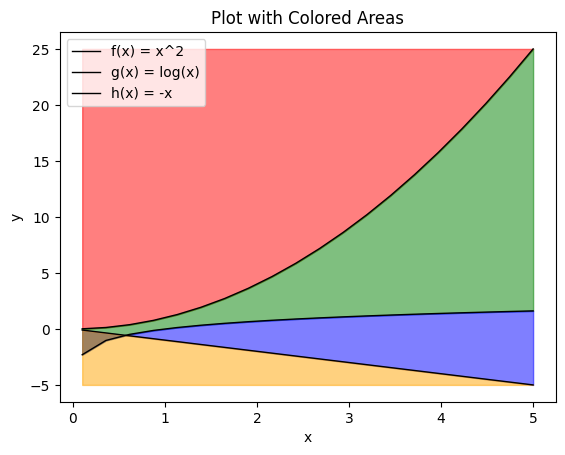

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def g(x):
    return np.log(x)

def h(x):
    return -x

x = np.linspace(0.1, 5, 20)  # Adjust the range to avoid log(0) error

y1 = f(x)
y2 = g(x)
y3 = h(x)


plt.plot(x, y1, 'k-', linewidth=1, label='f(x) = x^2')
plt.plot(x, y2, 'k-', linewidth=1, label='g(x) = log(x)')
plt.plot(x,y3,  'k-', linewidth=1, label='h(x) = -x')

plt.fill_between(x, y1, np.max(y1), where=(y1 > 0), color='red', alpha=0.5,interpolate=True)  # Area above f(x)
plt.fill_between(x, y1, y2, color='green', alpha=0.5)  # Area between f(x) and g(x)
plt.fill_between(x, y2,y3,color='blue', alpha=0.5,interpolate=True)  # Area below g(x)
plt.fill_between(x,y3,np.min(y3),where=(y3 <0),color='orange',alpha=0.5,interpolate=True)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot with Colored Areas')
#plt.grid(True)
plt.legend()

plt.show()


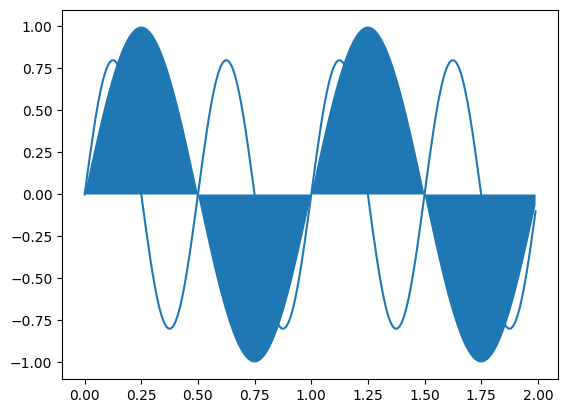

In [23]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

plt.plot(x,y2)
plt.fill_between(x, y1)